In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/openerotica-basilisk-v0-2-conversations-dataset/train.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/openerotica-basilisk-v0-2-conversations-dataset/train.csv')
df.head()

,id,conversations
0,0,"[{'from': 'human', 'value': ""make up a new tit..."
1,1,"[{'from': 'human', 'value': ""make up a title a..."
2,2,"[{'from': 'human', 'value': 'create a video ti..."
3,3,"[{'from': 'human', 'value': ""create an erotic ..."
4,4,"[{'from': 'human', 'value': 'Make up a long an..."


In [4]:
df.columns

Index(['id', 'conversations'], dtype='object')

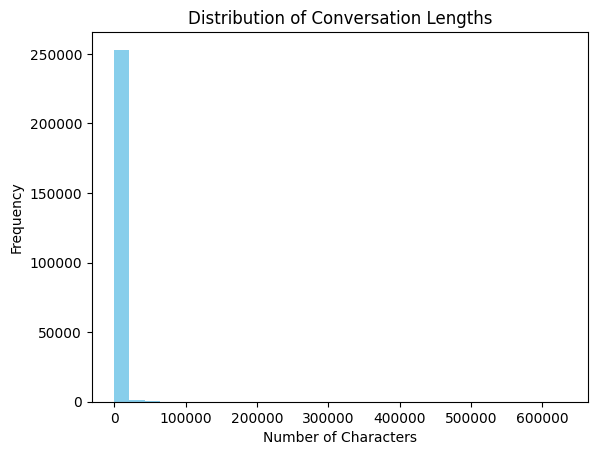

In [5]:
import matplotlib.pyplot as plt

# Calculate conversation length (number of characters)
df['length'] = df['conversations'].apply(len)

# Plot histogram of conversation lengths
plt.hist(df['length'], bins=30, color='skyblue')
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize conversations with TF-IDF (basic, no advanced cleaning)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['conversations'])

In [7]:
# For demonstraion: create dummy binary target (0 or 1 randomly)
import numpy as np
np.random.seed(0)
df['target'] = np.random.randint(0, 2, size=len(df))

y = df['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49     25400
           1       0.50      0.50      0.50     25589

    accuracy                           0.50     50989
   macro avg       0.50      0.50      0.50     50989
weighted avg       0.50      0.50      0.50     50989



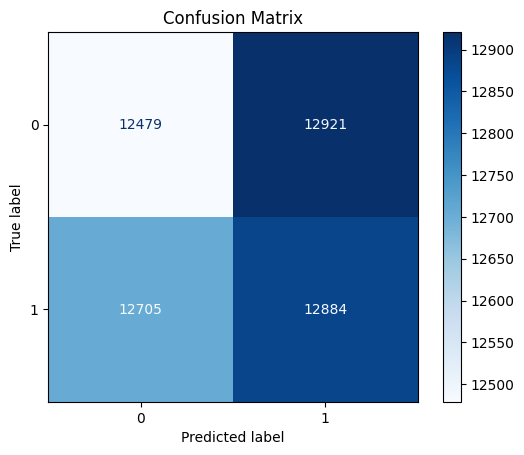

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()